# SAR IMAGE CLASSIFICATION
- Classification problem
- Oceanography/Meteorology
- Pierre Tandeo (pierre.tandeo@imt-atlantique.fr), Ronan Fablet (ronan.fablet@imt-atlantique.fr)

## Data and aim

In this project, we use SAR (Synthetic Aperture Radar) images (20km x 20km) of the ocean surface. The goal is to automatically classify different oceanic and atmospheric phenomena. Below, we will find an example of 10 classes corresponding to 10 different phenomena (among pure ocean swell in F, convective cells in I, icebergs in L, etc...):

![SAR](https://tandeo.files.wordpress.com/2019/01/sar_classes.png)

Here, we will use a database of 160 SAR images per class, anotated by experts. Data were collected in 2016 by the Sentinel-1 satellite.

## Evaluation and benchmark

We divided the database in two parts: "training" and "validation" folders with respectively 70% and 30% of the dataset. To learn the model (here a classifier), we propose to use cross-validations on the training dataset. Then, you will use the validation dataset to evaluate the performance of your model, using the total pourcentage of well predicted data. The reference result is **94% of accuracy** and is given by a deep leaning architecture. The reference paper is given below.

## Reference
- https://tandeo.files.wordpress.com/2019/11/wang_2019.pdf

### Importation libraries

In [9]:
# import classical libraries
%matplotlib inline
%pylab inline
import keras
import matplotlib.pyplot as plt
import numpy as np

# figure size
plt.rcParams['figure.figsize'] = (16, 9)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Prepare the datasets

Now, we load the training (70%) and validation (30%) datasets.

In [10]:

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
# import functions
from os import listdir
from os.path import isfile, join
from imageio import imread

from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense

# paths to the training and validation datasets
path_train = "training/"
path_validation = "validation/"

# class names
classes = ['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
class_num = np.arange(0,10)
# initialization
X_train = []
y_train = []

X_validation = []
y_validation = []

z_train = []
z_validation = []

# loop on images
for j in range(len(classes)):
    path = path_train + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    
    # training
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        #X_train.append(ravel(tmp[0:450:2,0:450:2,0]))
        X_train.append(ravel(tmp[0:450,0:450,0]))
        y_train.append(classes[j])
        z_train.append(class_num[j])

    
    # validation
    path = path_validation + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        #X_validation.append(ravel(tmp[0:450:2,0:450:2,0]))
        X_validation.append(ravel(tmp[0:450,0:450,0]))
        y_validation.append(classes[j])
        z_validation.append(class_num[j])

        

print(shape(X_train))
print(shape(X_validation))   
print(shape(z_validation))        



batch_size = 128
epochs = 30


(1120, 202500)
(480, 202500)
(480,)


In [0]:
#num_classes = 10
y_train = keras.utils.to_categorical(z_train, num_classes)
y_validation = keras.utils.to_categorical(z_validation, num_classes)

In [97]:
# transform to array
X_train = asarray(X_train)
X_validation = asarray(X_validation)

y_train = asarray(y_train)
y_validation = asarray(y_validation)

z_train = asarray(z_train)
z_validation = asarray(z_validation)


X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')

z_train = z_train.astype('float32')
z_validation = z_validation.astype('float32')

X_train /= 255
X_validation /= 255

print(shape(X_train))
print(shape(X_validation))     

num_classes = 10



(1120, 202500)
(480, 202500)


In [106]:
from keras.layers import Dropout
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(32, activation=None, input_shape=(202500,)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-5),
              metrics=['accuracy'])




Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 32)                6480032   
_________________________________________________________________
dense_78 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1290      
Total params: 6,485,546
Trainable params: 6,485,546
Non-trainable params: 0
_________________________________________________________________


Train on 1120 samples, validate on 480 samples
Epoch 1/20
1120/1120 [==============================] - 5s 4ms/step - loss: 2.4366 - acc: 0.1187 - val_loss: 2.3477 - val_acc: 0.1562
Epoch 2/20
1120/1120 [==============================] - 3s 2ms/step - loss: 2.3215 - acc: 0.1723 - val_loss: 2.2287 - val_acc: 0.1708
Epoch 3/20
1120/1120 [==============================] - 3s 2ms/step - loss: 2.2134 - acc: 0.2018 - val_loss: 2.1718 - val_acc: 0.1604
Epoch 4/20
1120/1120 [==============================] - 3s 2ms/step - loss: 2.0935 - acc: 0.2554 - val_loss: 2.2299 - val_acc: 0.2333
Epoch 5/20
1120/1120 [==============================] - 3s 2ms/step - loss: 1.9841 - acc: 0.3107 - val_loss: 2.1857 - val_acc: 0.2354
Epoch 6/20
1120/1120 [==============================] - 3s 2ms/step - loss: 1.8642 - acc: 0.3500 - val_loss: 2.0796 - val_acc: 0.2604
Epoch 7/20
1120/1120 [==============================] - 3s 2ms/step - loss: 1.7393 - acc: 0.4018 - val_loss: 2.1164 - val_acc: 0.2687
Epoch 8/20
1120

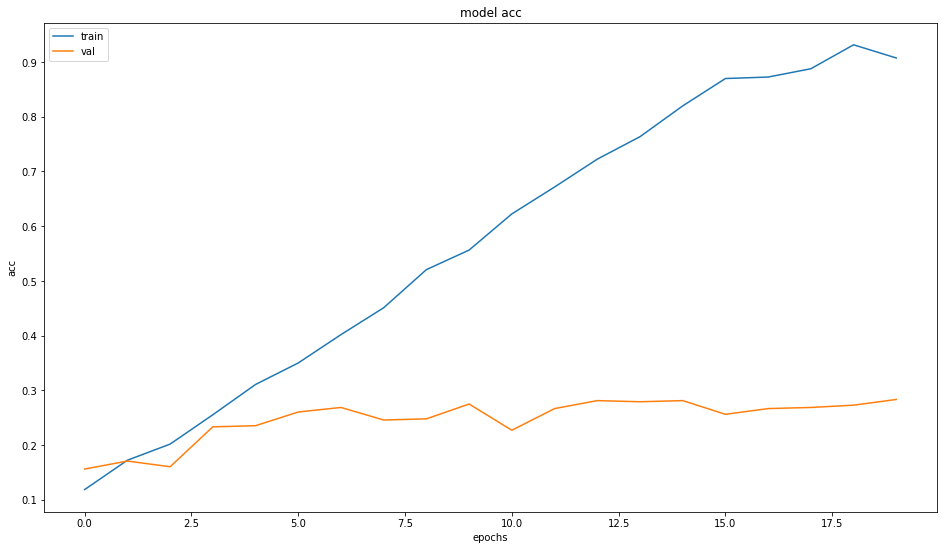

Test loss: 2.0114988724390668
Test accuracy: 0.2833333333333333


In [107]:
batch_size = 4
epochs = 20

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_validation, y_validation))
score = model.evaluate(X_validation, y_validation, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Visualize history (loss vs epochs)
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')  
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

score = model.evaluate(X_validation, y_validation, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Normalized confusion matrix


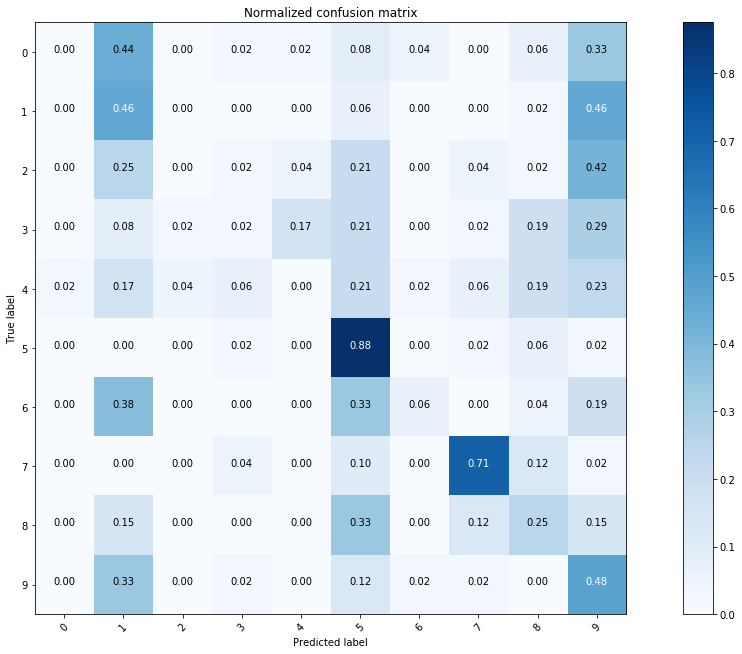

In [76]:
class_names= ['0','1','2','3','4','5','6','7','8','9']
y_pred = model.predict(X_validation)
z_pred = np.argmax(y_pred,axis=1)
index = np.where(z_pred - z_validation != 0)
im_test = X_validation.reshape(480, 450, 450)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(z_validation, z_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [8]:
np.max(X_validation)

1.0

### Apply naive classifier

In [0]:
# import functions
#from sklearn.neighbors.nearest_centroid import NearestCentroid
#from sklearn.metrics import accuracy_score

# apply k-nearest classification
#clf = NearestCentroid()
#clf.fit(X_train, y_train)
#y_predict = clf.predict(X_validation)

# compute average classifier score
#print('Accuracy: '+ str(accuracy_score(y_validation, y_predict)))

# we are far from the 94% accuracy given a deep learning model!


In [9]:
np.max(X_train)

1.0

In [14]:
#NEURAL NETWORK


##TEST AVEC CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# import classical libraries
%matplotlib inline
%pylab inline
import keras
import matplotlib.pyplot as plt
import numpy as np

# figure size
plt.rcParams['figure.figsize'] = (16, 9)

# import functions
from os import listdir
from os.path import isfile, join
from imageio import imread

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

# paths to the training and validation datasets
path_train = "training/"
path_validation = "validation/"

# class names
classes = ['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
class_num = np.arange(0,10)
# initialization
X_train = []
y_train = []

X_validation = []
y_validation = []

z_train = []
z_validation = []

# loop on images
for j in range(len(classes)):
    path = path_train + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    
    # training
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        X_train.append(ravel(tmp[0:450,0:450,0]))
        y_train.append(classes[j])
        z_train.append(class_num[j])

    
    # validation
    path = path_validation + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        X_validation.append(ravel(tmp[0:450,0:450,0]))
        y_validation.append(classes[j])
        z_validation.append(class_num[j])

X_train = asarray(X_train)
X_validation = asarray(X_validation)

y_train = asarray(y_train)
y_validation = asarray(y_validation)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
shape(y_train)


(1120,)

In [0]:
img_rows, img_cols = 450, 450
num_classes = 10
# build 4D tensors
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_validation = X_validation.reshape(X_validation.shape[0], img_rows, img_cols, 1)
# data normalization
X_train = X_train.astype('float32')/255.
X_validation = X_validation.astype('float32')/255.

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(z_train, num_classes)
y_validation = keras.utils.to_categorical(z_validation, num_classes)



In [4]:
np.max(X_train)

NameError: ignored

In [1]:
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, strides=(2,2),kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(16, 16)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


NameError: ignored

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
batch_size = 128
epochs = 30
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_validation, y_validation))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1120 samples, validate on 480 samples
Epoch 1/30





1120/1120 [==============================] - 23s 20ms/step - loss: 2.3256 - acc: 0.1223 - val_loss: 2.2176 - val_acc: 0.2292
Epoch 2/30
1120/1120 [==============================] - 3s 3ms/step - loss: 2.1398 - acc: 0.2866 - val_loss: 1.9751 - val_acc: 0.2979
Epoch 3/30
1120/1120 [==============================] - 3s 3ms/step - loss: 1.8453 - acc: 0.3473 - val_loss: 1.6352 - val_acc: 0.4271
Epoch 4/30
1120/1120 [==============================] - 3s 3ms/step - loss: 1.5878 - acc: 0.4188 - val_loss: 1.4745 - val_acc: 0.4417
Epoch 5/30
1120/1120 [==============================] - 3s 3ms/step - loss: 1.5514 - acc: 0.4027 - val_loss: 1.4416 - val_acc: 0.4271
Epoch 6/30
1120/1120 [==============================] - 3s 3ms/step - loss: 1.4674 - acc: 0.4420 - val_loss: 1.4397 - val_acc: 0.4271
Epoch 7/30
1120/1120 [=======================

Train on 1120 samples, validate on 480 samples
Epoch 1/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.4312 - acc: 0.8848 - val_loss: 0.9358 - val_acc: 0.6542
Epoch 2/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.4046 - acc: 0.8955 - val_loss: 0.9511 - val_acc: 0.6521
Epoch 3/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3972 - acc: 0.9054 - val_loss: 0.9628 - val_acc: 0.6479
Epoch 4/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3510 - acc: 0.9143 - val_loss: 0.9798 - val_acc: 0.6542
Epoch 5/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3515 - acc: 0.9116 - val_loss: 0.9227 - val_acc: 0.6583
Epoch 6/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3434 - acc: 0.9143 - val_loss: 0.9678 - val_acc: 0.6354
Epoch 7/30
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3175 - acc: 0.9098 - val_loss: 0.9640 - val_acc: 0.6312
Epoch 8/30
1120

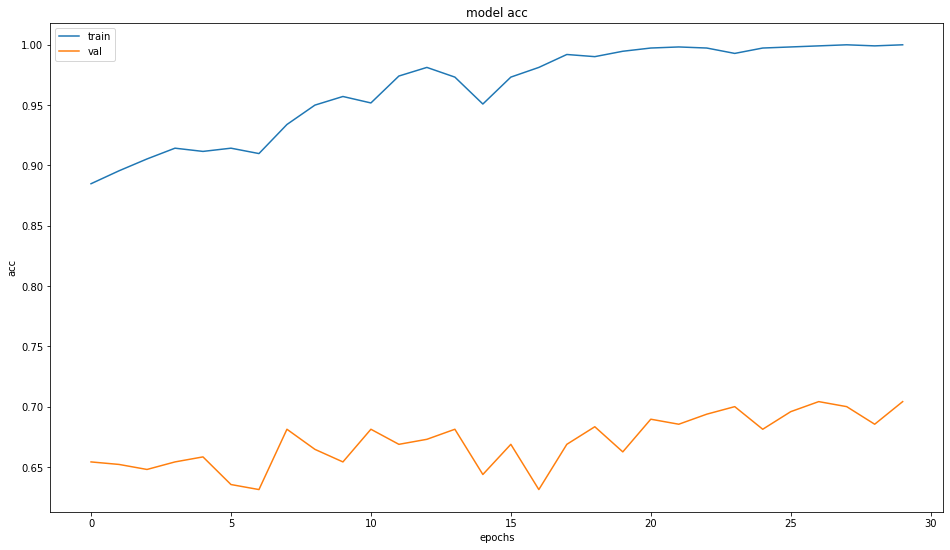

Test loss: 0.8907207151254019
Test accuracy: 0.7041666666666667


In [85]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_validation, y_validation))

# list all data in history
print(history.history.keys())

#Visualize history (loss vs epochs)
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')  
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

score = model.evaluate(X_validation, y_validation, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [86]:
shape(X_validation)

(480, 450, 450, 1)

Normalized confusion matrix


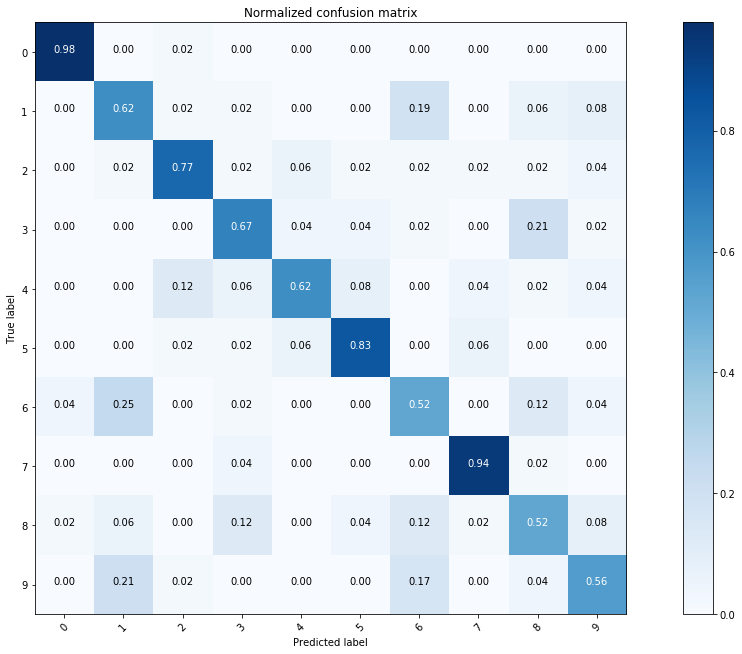

In [87]:
from sklearn.metrics import confusion_matrix
import itertools

class_names= ['0','1','2','3','4','5','6','7','8','9']

y_pred = model.predict(X_validation)


z_pred = np.argmax(y_pred,axis=1)
index = np.where(z_pred - z_validation != 0)

im_test = X_validation.reshape(480, 450, 450)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(z_validation, z_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [88]:
shape(z_pred)

(480,)

In [89]:
shape(z_validation)

(480,)

In [90]:
shape(y_validation)

(480, 10)

In [91]:
z_pred[0]

0